In [5]:
#1. Flowchart
def print_values(a, b, c):
    if a > b:
        if b > c:
            x, y, z = a, b, c
            result = x + y - 10 * z
            print(a, b, c)
        else:
            if a > c:
                x, y, z = a, c, b
                result = x + y - 10 * z
            else:
                x, y, z = c, a, b
                result = x + y - 10 * z
        print(f"result: {result}")
    else:
        if b > c:
            print(a, b, c)
        else:
            x, y, z = c, b, a
            result = x + y - 10 * z
            print(f"result: {result}")
print("a = 5, b = 15, c = 10:")
print_values(5, 15, 10)
import random
print("\n测试随机的值:")
for _ in range(3):
    a = random.randint(1, 20)
    b = random.randint(1, 20)
    c = random.randint(1, 20)
    print(f"a = {a}, b = {b}, c = {c}")
    print_values(a, b, c)

a = 5, b = 15, c = 10:
5 15 10

测试随机的值:
a = 4, b = 7, c = 10
result: -23
a = 6, b = 11, c = 13
result: -36
a = 15, b = 7, c = 20
result: -35


In [7]:
#2. Continuous celing function
import math
from functools import lru_cache
@lru_cache(None)
def F(x):
    if x == 1:
        return 1
    return F(math.ceil(x / 3)) + 2 * x
nums = [1, 2, 3, 4, 5, 6,]
result = [F(x) for x in nums]
print(nums)
print(result)

[1, 2, 3, 4, 5, 6]
[1, 5, 7, 13, 15, 17]


In [6]:
#3. Dice rolling
def Find_number_of_ways(n, x):
    dp = [0] * (x + 1)
    dp[0] = 1
    for _ in range(n):
        new_dp = [0] * (x + 1)
        for j in range(x + 1):
            if dp[j] != 0:
                for k in range(1, 7):  
                    if j + k <= x:
                        new_dp[j + k] += dp[j]
        dp = new_dp
    return dp
n = 10
xmax = 60
xmin = 10
dp = Find_number_of_ways(n, xmax)
Number_of_ways = [dp[x] for x in range(xmin, xmax + 1)]
max_ways = max(Number_of_ways)
x_with_max = xmin + Number_of_ways.index(max_ways)
print("Number_of_ways =", Number_of_ways)
print(f"Maximum number of ways = {max_ways} occurs at x = {x_with_max}")

Number_of_ways = [1, 10, 55, 220, 715, 2002, 4995, 11340, 23760, 46420, 85228, 147940, 243925, 383470, 576565, 831204, 1151370, 1535040, 1972630, 2446300, 2930455, 3393610, 3801535, 4121260, 4325310, 4395456, 4325310, 4121260, 3801535, 3393610, 2930455, 2446300, 1972630, 1535040, 1151370, 831204, 576565, 383470, 243925, 147940, 85228, 46420, 23760, 11340, 4995, 2002, 715, 220, 55, 10, 1]
Maximum number of ways = 4395456 occurs at x = 35


Array: [1, 2, 3]
Sum of averages: 14.0


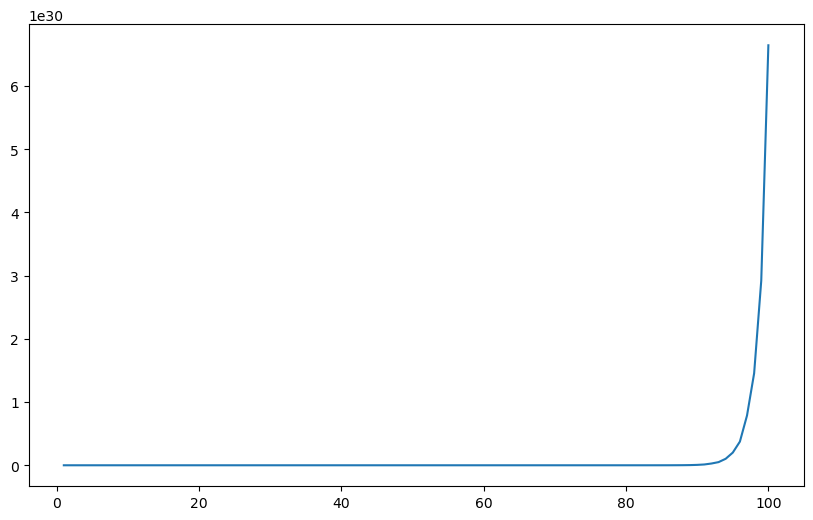

描述：随着N的增大，所有子集的平均值之和呈指数级增长。


In [10]:
#4. Dynamic programming
import random
import matplotlib.pyplot as plt
def Random_integer(N):
    return [random.randint(0, 10) for _ in range(N)] 
def Sum_averages(arr):
    n = len(arr) 
    if n == 0:
        return
    total_sum = sum(arr)  
    return total_sum * (2 **n - 1) / n
arr = [1, 2, 3]
print("Array:", arr)
print("Sum of averages:", Sum_averages(arr))
Total_sum_averages = []
for N in range(1, 101):
    arr = Random_integer(N)
    current_sum = Sum_averages(arr)
    Total_sum_averages.append(current_sum)
plt.figure(figsize=(10, 6))  
plt.plot(
    range(1, 101),  
    Total_sum_averages,  
)
plt.savefig('sum_of_averages_plot.png', dpi=300, bbox_inches='tight')
plt.show() 
print("描述：随着N的增大，所有子集的平均值之和呈指数级增长。")

In [33]:
#5. Path counting
import random 
def create_matrix(rows, cols):
    matrix = []
    for i in range(rows): 
        row = []  
        for j in range(cols): 
            if (i == 0 and j == 0) or (i == rows-1 and j == cols-1):
                row.append(1)
            else:
                row.append(random.randint(0, 1))
        matrix.append(row) 
    return matrix
def count_path(matrix):

    if not matrix: 
        return 0
    rows = len(matrix) 
    cols = len(matrix[0]) 

    if matrix[0][0] == 0 or matrix[rows-1][cols-1] == 0:
        return 0
    dp = []
    for i in range(rows):
        dp_row = [0] * cols 
        dp.append(dp_row)
    dp[0][0] = 1
    for j in range(1, cols):  
        if matrix[0][j] == 1:
            dp[0][j] = dp[0][j-1]
    for i in range(1, rows):
        if matrix[i][0] == 1:
            dp[i][0] = dp[i-1][0]
    for i in range(1, rows): 
        for j in range(1, cols): 
            if matrix[i][j] == 1: 
                dp[i][j] = dp[i-1][j] + dp[i][j-1]
    return dp[rows-1][cols-1]
def calculate_average():
    rows = 10  
    cols = 8   
    total_experiments = 1000  
    total_paths = 0  
    for i in range(total_experiments):
        mat = create_matrix(rows, cols)
        paths = count_path(mat)
        total_paths += paths
    average = total_paths / total_experiments
    return average
if __name__ == "__main__":
    test_matrix = create_matrix(8, 10)
    print("测试的8x10矩阵：")
    for row in test_matrix:
        print(row)
    test_paths = count_path(test_matrix)
    print(f"这个8x10矩阵的路径数：{test_paths}")
    avg = calculate_average()
    print(f"1000次实验的平均路径数：{avg:.2f}")

测试的8x10矩阵：
[1, 1, 0, 1, 1, 0, 1, 1, 1, 1]
[0, 1, 1, 0, 0, 1, 0, 1, 0, 1]
[1, 0, 1, 1, 0, 1, 1, 0, 0, 1]
[1, 1, 1, 1, 0, 1, 1, 1, 1, 0]
[0, 0, 0, 1, 0, 1, 1, 0, 1, 0]
[1, 1, 1, 1, 1, 0, 1, 0, 0, 1]
[1, 1, 1, 1, 1, 0, 1, 0, 0, 0]
[0, 0, 1, 1, 0, 1, 1, 0, 1, 1]
这个8x10矩阵的路径数：0
1000次实验的平均路径数：0.24
